In [51]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from methods_time_integrals import quadratic_friction, linear_friction, integrate

In [52]:
def find_Cdnod(ts, Cd):
    L = ts.L_area
    ub2 = ts.ub2circ_area.values/L
    u = ts.ucirc_area.values/L 
    
    return Cd*ub2/(u*np.abs(u))

In [65]:
def plot_integrals(ts, dt=60*60*24, friciton="quadratic", adjustDc = True, staticDc = True, dynamicDc = False, R=5e-4):
    color_wind = "cornflowerblue"
    color_nonlin = "darkorange"
    
    L = ts.L_area
    t = ts.ocean_time

    

    tau = ts.taucirc_area.values/L#(L*H*rho)
    nonlin = tau + ts.zflux_area.values/L
    u = ts.ucirc_area.values/L
    u0 = u[0]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(t, u, color="black", label="simulations")
    
    ax.plot((np.nan), (np.nan), color=color_wind, label = "surface forcing")
    ax.plot((np.nan), (np.nan),color=color_nonlin, label = "surface forcing + vorticity flux")
    
    ax.set_xlabel("Time [year]")
    ax.set_ylabel("Normalized circulation [m s-1]")
    
    if friciton == "linear":
        uwind = integrate(tau, dt, u0, friction=friciton, R=R)
        unonlin = integrate(nonlin, dt, u0, friction=friciton, R=R)
        
        ax.plot(t, uwind, color=color_wind, lw=1)
        ax.plot(t, unonlin, color=color_nonlin, lw=1)
        
        ax.legend()
        
        return fig, ax
    
    if not adjustDc: 
        uwind = integrate(tau, dt, u0, friction=friciton)
        unonlin = integrate(nonlin, dt, u0, friction=friciton)
        
        ax.plot(t, uwind, color=color_wind, lw=1)
        ax.plot(t, unonlin, color=color_nonlin, lw=1)
        
        return fig, ax
    
    
    Cd = find_Cdnod(ts, 0.003)
     
    ls_dyn = "solid"

    if staticDc:
        uwind_statCd = integrate(tau, dt, u0, friction=friciton, Cd=np.nanmean(Cd))
        unonlin_statCd = integrate(nonlin, dt, u0, friction=friciton, Cd=np.nanmean(Cd))
        
        ax.plot(t, uwind_statCd, color=color_wind, lw=1)
        ax.plot(t, unonlin_statCd, color=color_nonlin, lw=1)ax.set_xlabel("Time [year]")
        
        ls_dyn = "dashed"

    if dynamicDc:
        uwind_dynCd = integrate(tau, dt, u0, friction=friciton, Cd=Cd)
        unonlin_dynCd = integrate(nonlin, dt, u0, friction=friciton, Cd=Cd)
        
        ax.plot(t, uwind_dynCd, color=color_wind, lw=1, ls=ls_dyn)
        ax.plot(t, unonlin_dynCd, color=color_nonlin, lw=1, ls=ls_dyn)
        
    
    
    ax.legend()
    
    return fig, ax

In [66]:
# Define the data path where datasets are stored
datapath = "data/"

# Define the drag coefficient
dt = 60*60*24

H = 3114
rho = 1025

# Define the filenames for the datasets (these should be updated with the correct file paths)
A4_file = "A4/A4_lofoten_h_50km_timeseries.nc" 
L800_file = "lofoten800/lofoten800_lofoten_h_50km_timeseries.nc" 

# Load the datasets using xarray
ts_A4 = xr.open_dataset(datapath + A4_file)
ts_A4["taucirc_area"] = ts_A4.taucirc_area/(H*rho)
ts_A4["taucirc_line"] = ts_A4.taucirc_line/(H*rho)
ts_L800 = xr.open_dataset(datapath + L800_file).sel(ocean_time=slice("01.01.1997", None))
ts_L800["zflux_area"] = ts_L800.zbarflux_area + ts_L800.znodflux_area
ts_L800["zflux_line"] = ts_L800.zbarflux_line + ts_L800.znodflux_line

sns.set_theme("notebook")

Text(0.5, 1.0, 'Arctic4, quadratic friction with adjusted friction parameter')

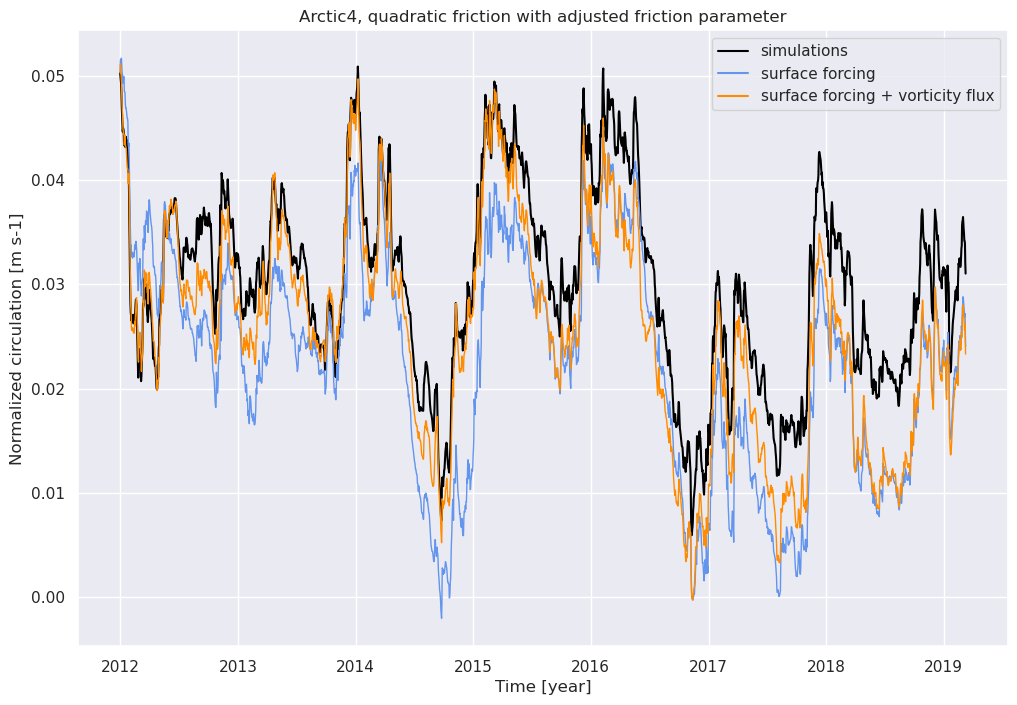

In [67]:
#figAf, axA4 = plot_integrals(ts_A4, friciton="linear", R=5e-4);
figA4, axA4 = plot_integrals(ts_A4, friciton="quadratic");
axA4.set_title("Arctic4, quadratic friction with adjusted friction parameter")

figA4.

Text(0.5, 1.0, 'Lofoten800, quadratic friction with adjusted friction parameter')

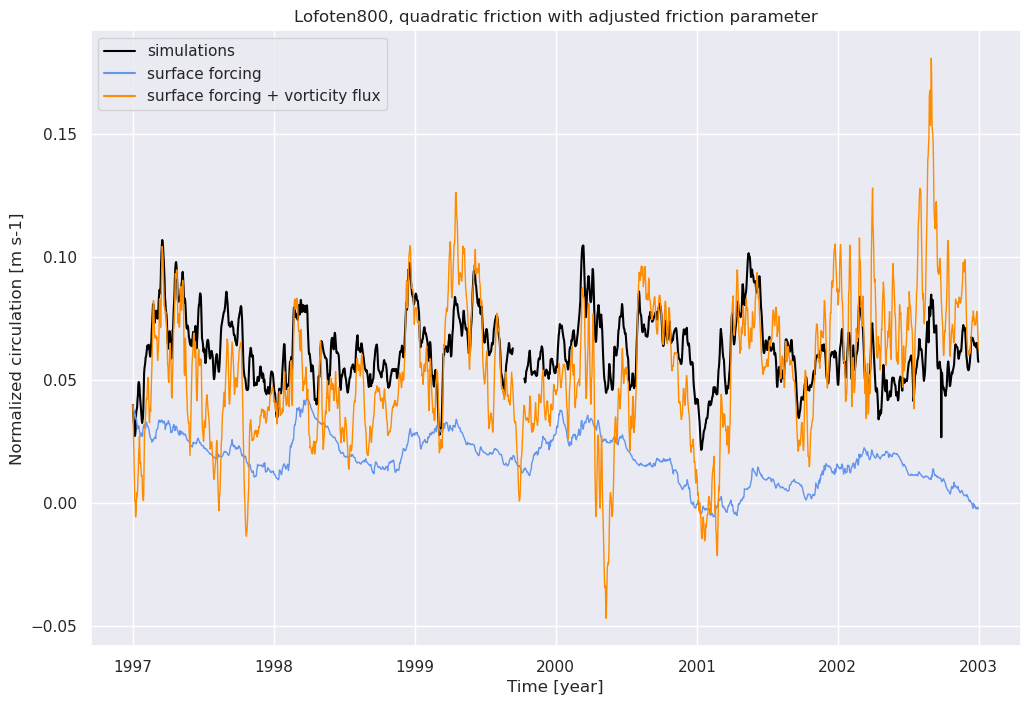

In [68]:
#figAf, axA4 = plot_integrals(ts_A4, friciton="linear", R=5e-4);
figL800, axL800 = plot_integrals(ts_L800, friciton="quadratic");
axL800.set_title("Lofoten800, quadratic friction with adjusted friction parameter")